In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn import metrics
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

data = pd.read_csv('/Users/andreihauryk/Desktop/dataset_1.csv', index_col = 0)
data.head()

,68760,1
68708,,
68716,68876,1
68720,68844,1
68748,68736,1
68748,68736,1
68748,68736,1


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44617 entries, 68716 to 67960
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   68760   44617 non-null  int64
 1   1       44617 non-null  int64
dtypes: int64(2)
memory usage: 1.0 MB


In [3]:
data.isnull().any()

68760    False
1        False
dtype: bool

In [4]:
data.shape

(44617, 2)

In [5]:
temp_data = data['1']
data_x = data.copy()
data_x = data_x.drop('1', axis =1)
X = data_x
print("    __X__")
X.head()

    __X__


,68760
68708,
68716,68876
68720,68844
68748,68736
68748,68736
68748,68736


In [6]:
le = LabelEncoder()

temp_data = le.fit_transform(temp_data)
Y = temp_data
print("__Y__")
Y

__Y__


array([1, 1, 1, ..., 1, 1, 1])

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X , Y, test_size = 0.2, random_state = 42)


print("Training split input- ", x_train.shape)
print("Testing split input- ", x_test.shape)


Training split input-  (35693, 1)
Testing split input-  (8924, 1)


In [8]:
decision_tree=DecisionTreeClassifier()
decision_tree = decision_tree.fit(x_train,y_train)
y_pred = decision_tree.predict(x_test)
print("Accurancy on training set: {:3f}".format(decision_tree.score(x_train,y_train)))
print("Accurancy on test set: {:3f}".format(decision_tree.score(x_test,y_test)))



Accurancy on training set: 0.767097
Accurancy on test set: 0.769722


[Text(558.0, 906.0, '68760 <= 68306.0\ngini = 0.3839\nsamples = 35693\nvalue = [9246, 26447]\nclass = target'),
 Text(279.0, 543.6, '68760 <= 68060.0\ngini = 0.0176\nsamples = 18451\nvalue = [164, 18287]\nclass = target'),
 Text(139.5, 181.19999999999993, 'gini = 0.0\nsamples = 1317\nvalue = [0, 1317]\nclass = target'),
 Text(418.5, 181.19999999999993, 'gini = 0.019\nsamples = 17134\nvalue = [164, 16970]\nclass = target'),
 Text(837.0, 543.6, '68760 <= 68484.0\ngini = 0.4986\nsamples = 17242\nvalue = [9082, 8160]\nclass = pc'),
 Text(697.5, 181.19999999999993, 'gini = 0.4985\nsamples = 17231\nvalue = [9082, 8149]\nclass = pc'),
 Text(976.5, 181.19999999999993, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]\nclass = target')]

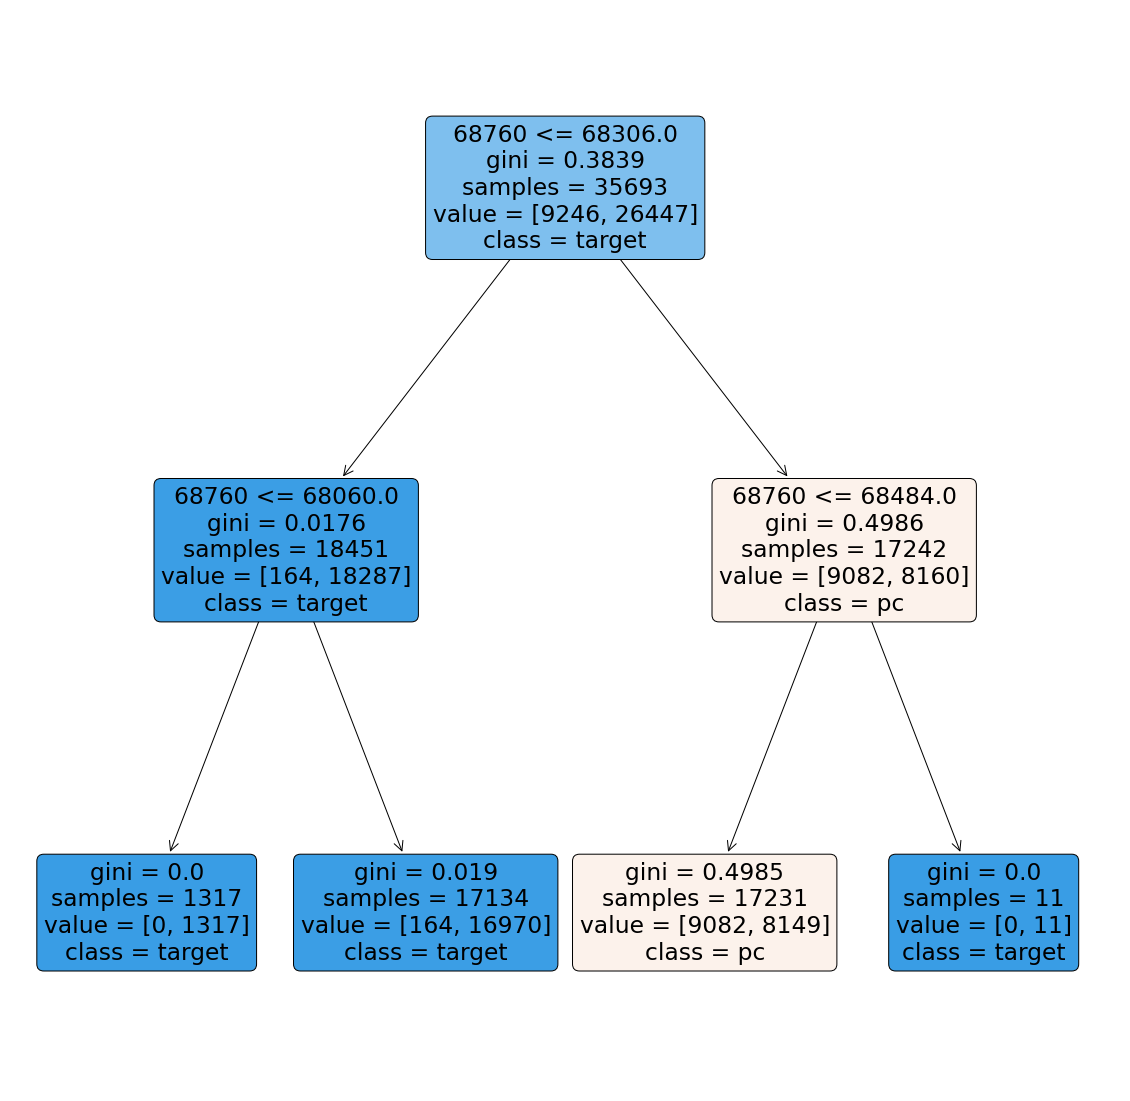

In [9]:
plt.figure(figsize = (20,20))
decision_tree = plot_tree(decision_tree=decision_tree, feature_names = data_x.columns, 
                     class_names =["pc", "target", "Taken,y or n"] , filled = True , precision = 4, rounded = True)

plt.savefig("one1.png")
decision_tree

In [10]:
print("Predicted values:\n",y_pred)

Predicted values:
 [0 1 0 ... 1 0 1]


In [11]:
decision_tree_2=DecisionTreeClassifier(criterion="entropy",max_depth=3)
desion_tree_2 = decision_tree_2.fit(x_train,y_train)
y_pred_2 = decision_tree_2.predict(x_test)
print("Accurancy on training set: {:3f}".format(decision_tree_2.score(x_train,y_train)))
print("Accurancy on test set: {:3f}".format(decision_tree_2.score(x_test,y_test)))

Accurancy on training set: 0.767097
Accurancy on test set: 0.769722


In [12]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [13]:
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier(n_estimators=20, random_state=0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[2198   36]
 [2019 4671]]
              precision    recall  f1-score   support

           0       0.52      0.98      0.68      2234
           1       0.99      0.70      0.82      6690

    accuracy                           0.77      8924
   macro avg       0.76      0.84      0.75      8924
weighted avg       0.87      0.77      0.79      8924

0.7697220977140296
